In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates

In [2]:
df = pd.read_csv('building-permits.csv')

C:\Users\Michael\anaconda3\envs\build\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1,49,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = df.drop(columns=['ID', 'PERMIT#', 'ISSUE_DATE','STREET_NUMBER', 'STREET DIRECTION', 'STREET_NAME',
                      'SUFFIX', 'WORK_DESCRIPTION', 'BUILDING_FEE_PAID', 'ZONING_FEE_PAID', 'OTHER_FEE_PAID',
                      'SUBTOTAL_PAID', 'BUILDING_FEE_UNPAID', 'ZONING_FEE_UNPAID', 'OTHER_FEE_UNPAID',
                      'SUBTOTAL_UNPAID', 'BUILDING_FEE_WAIVED', 'ZONING_FEE_WAIVED', 'OTHER_FEE_WAIVED',
                      'SUBTOTAL_WAIVED', 'TOTAL_FEE', 'CONTACT_1_TYPE', 'CONTACT_1_NAME', 'CONTACT_1_CITY',
                      'CONTACT_1_STATE', 'CONTACT_1_ZIPCODE', 'CONTACT_2_TYPE', 'CONTACT_2_NAME',
                      'CONTACT_2_CITY', 'CONTACT_2_STATE', 'CONTACT_2_ZIPCODE', 'CONTACT_3_TYPE',
                      'CONTACT_3_NAME', 'CONTACT_3_CITY', 'CONTACT_3_STATE', 'CONTACT_3_ZIPCODE',
                      'CONTACT_4_TYPE', 'CONTACT_4_NAME', 'CONTACT_4_CITY', 'CONTACT_4_STATE',
                      'CONTACT_4_ZIPCODE', 'CONTACT_5_TYPE', 'CONTACT_5_NAME', 'CONTACT_5_CITY',
                      'CONTACT_5_STATE', 'CONTACT_5_ZIPCODE', 'CONTACT_6_TYPE', 'CONTACT_6_NAME',
                      'CONTACT_6_CITY', 'CONTACT_6_STATE', 'CONTACT_6_ZIPCODE', 'CONTACT_7_TYPE',
                      'CONTACT_7_NAME', 'CONTACT_7_CITY', 'CONTACT_7_STATE', 'CONTACT_7_ZIPCODE',
                      'CONTACT_8_TYPE', 'CONTACT_8_NAME', 'CONTACT_8_CITY', 'CONTACT_8_STATE',
                      'CONTACT_8_ZIPCODE', 'CONTACT_9_TYPE', 'CONTACT_9_NAME', 'CONTACT_9_CITY',
                      'CONTACT_9_STATE', 'CONTACT_9_ZIPCODE', 'CONTACT_10_TYPE', 'CONTACT_10_NAME',
                      'CONTACT_10_CITY', 'CONTACT_10_STATE', 'CONTACT_10_ZIPCODE', 'CONTACT_11_TYPE',
                      'CONTACT_11_NAME', 'CONTACT_11_CITY', 'CONTACT_11_STATE', 'CONTACT_11_ZIPCODE',
                      'CONTACT_12_TYPE', 'CONTACT_12_NAME', 'CONTACT_12_CITY', 'CONTACT_12_STATE',
                      'CONTACT_12_ZIPCODE', 'CONTACT_13_TYPE', 'CONTACT_13_NAME', 'CONTACT_13_CITY',
                      'CONTACT_13_STATE', 'CONTACT_13_ZIPCODE', 'CONTACT_14_TYPE', 'CONTACT_14_NAME',
                      'CONTACT_14_CITY', 'CONTACT_14_STATE', 'CONTACT_14_ZIPCODE', 'CONTACT_15_TYPE',
                      'CONTACT_15_NAME', 'CONTACT_15_CITY', 'CONTACT_15_STATE', 'CONTACT_15_ZIPCODE',
                      'REPORTED_COST', 'PIN1', 'PIN2', 'PIN3', 'PIN4', 'PIN5', 'PIN6', 'PIN7', 'PIN8',
                      'PIN9', 'PIN10', 'COMMUNITY_AREA', 'CENSUS_TRACT', 'WARD', 'XCOORDINATE',
                      'YCOORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'Boundaries - ZIP Codes',
                      'Community Areas', 'Zip Codes', 'Census Tracts', 'Wards', ':@computed_region_awaf_s7ux'])

I know I must get rid of null values in the processing time column, then remove the negative values.  Then format the date columns and remove dates before Jan 2006 since the data is sparse.

In [4]:
#============================================================================== Data Cleaning
def find_null(col):
    print('Do I have any null values in my dataframe, if so, how many')
    print(df.isnull().values.any())
    print(df.isnull().sum().sum())
    print('Do I have any null values in my Column of interest, if so, how many')
    print(df[col].isnull().values.any())
    print(df[col].isnull().sum())
    
# Remove Null Data
#find_null('PROCESSING_TIME')
df = df[df['PROCESSING_TIME'].notna()]
# print('Lets hope this is false')
# print(df['PROCESSING_TIME'].isnull().values.any())
# print(df.shape)
# print('Now we will remove negative values.')
# This one is negative --->  df['PROCESSING_TIME'][16457]   #.min()
print('Null data removed.')

# Remove data with negative processing times
df = df[df['PROCESSING_TIME'] >= 0]
# print(df.shape)
# print(df['PROCESSING_TIME'].min())
# print('This should be zero')
print('All permit processing times are now positive.')

#====================  Format for dates
df['APPLICATION_START_DATE'] = pd.to_datetime(df['APPLICATION_START_DATE'], format="%Y-%m-%dT%H:%M:%S")
# print(df['APPLICATION_START_DATE'].dtype)
print('Dates are now formatted to datetime64[ns]')

#====================  Get rid of data before 2006
# print(df['APPLICATION_START_DATE'].dtype)
t = np.datetime64('2006-01-01')
df = df[df['APPLICATION_START_DATE'] > np.datetime64('2006-01-01')]
print('Data before 2006 is very sparse, it has been removed')

Null data removed.
All permit processing times are now positive.
Dates are now formatted to datetime64[ns]
Data before 2006 is very sparse, it has been removed


Our outliers are below -10.5, and above 17.5
Percentage of outliers in data: 18%
The number of outliers is: 108843
99% of applications are processed withing 274.0 days.


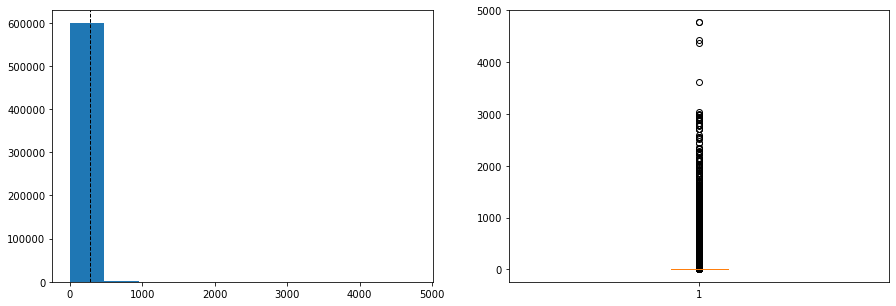

In [5]:


# ===================== Outlier Analysis
q1 = np.percentile(df['PROCESSING_TIME'], 25, interpolation='midpoint')
q3 = np.percentile(df['PROCESSING_TIME'], 75, interpolation='midpoint')
q99 = np.percentile(df['PROCESSING_TIME'], 99, interpolation='midpoint')
iqr = q3 - q1
low_lim = q1 - 1.5*iqr
high_lim = q3 + 1.5*iqr
print('Our outliers are below ' + str(low_lim) + ', and above ' + str(high_lim))

df_nml = df[df['PROCESSING_TIME'] <= high_lim]
df_out = df[df['PROCESSING_TIME'] > high_lim]
pct_outlier = 100*len(df_out)/len(df)
print('Percentage of outliers in data: {:02.0f}%'.format(pct_outlier))
print('The number of outliers is: '+ str(len(df_out)))


# ======================================================= Plot histogram and boxplot
plt.rcParams["figure.figsize"] = (15,5)
plt.subplot(1,2,1)
plt.hist(df['PROCESSING_TIME'])#,range=(0,500))
plt.axvline(q99, color='k', linestyle='dashed', linewidth=1)
plt.subplot(1,2,2)
x = plt.boxplot(df['PROCESSING_TIME'])
print('99% of applications are processed withing {} days.'.format(q99))

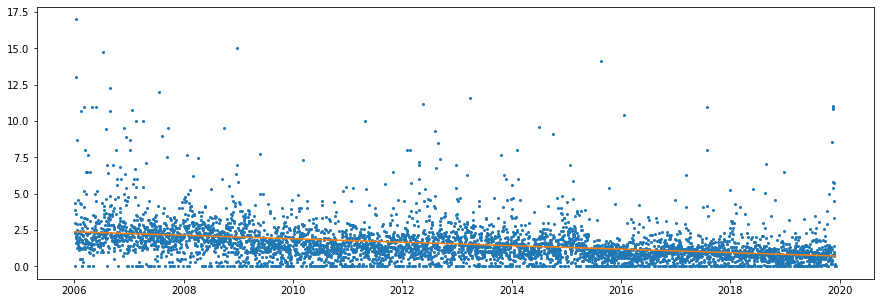

In [6]:
def rsq(yhat, y):
    '''
    yhat is the estimation from independent variable
    y is dependent variable
    return the r-squared value of 
    '''
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    return ssreg/sstot

S = df_nml.groupby('APPLICATION_START_DATE')['PROCESSING_TIME'].mean(numeric_only=False)

#============================================================================== Simple Regression Analysis

x = dates.date2num(S.index)
y = S.values
d = np.polyfit(x,y, 1)
f = np.poly1d(d)
plt.plot_date(S.index, S.values,markersize=2)
plt.plot(S.index, f(x) )
plt.show()

Lets investigate how many total permits are applied for, annually and monthly.

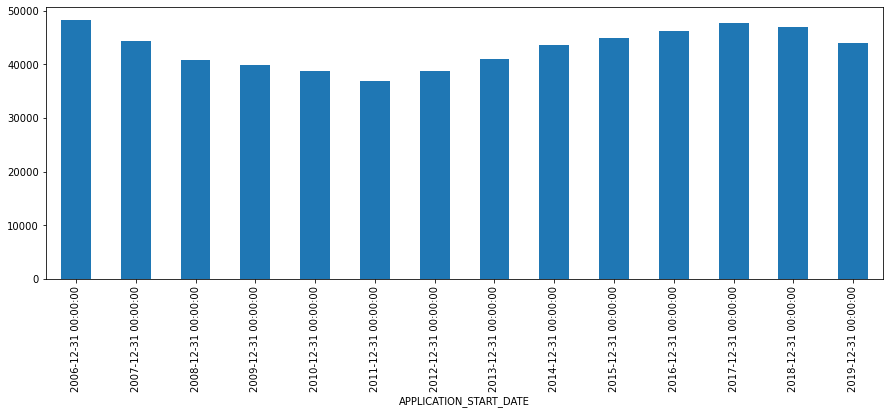

In [7]:
df_edit = df.drop(columns=['REVIEW_TYPE', 'PERMIT_TYPE'])
df_edit.head()
type(df_edit.groupby(pd.Grouper(key='APPLICATION_START_DATE', freq='Y')).count())
df_annual = df_edit.groupby(pd.Grouper(key='APPLICATION_START_DATE', freq='Y')).count()
df_monthly = df_edit.groupby(pd.Grouper(key='APPLICATION_START_DATE', freq='M')).count()

tr = df_annual.plot(kind='bar',legend=None)

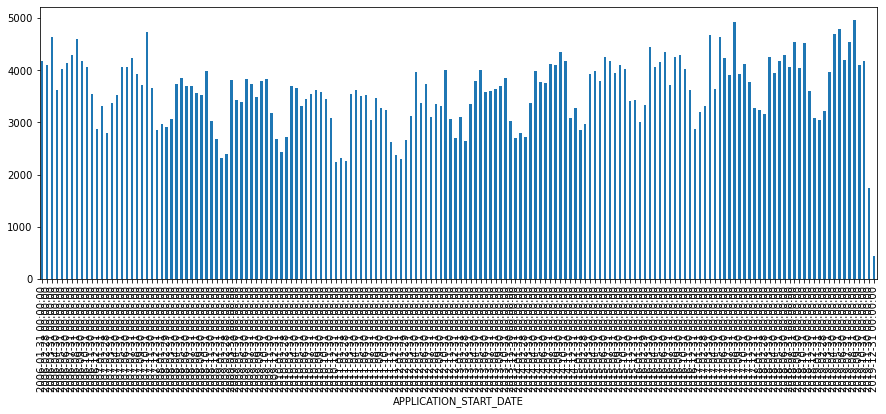

In [8]:
tr = df_monthly.plot(kind='bar',legend=None)

Let's look at the same for each permit type

In [9]:
permit_list = df['PERMIT_TYPE'].unique()

In [10]:
def subframe(permit_type):
    print(permit_type)
    df_sub = df.loc[df['PERMIT_TYPE'] == permit_type]
    
    # ===================== Outlier Analysis
    q1 = np.percentile(df_sub['PROCESSING_TIME'], 25, interpolation='midpoint')
    q3 = np.percentile(df_sub['PROCESSING_TIME'], 75, interpolation='midpoint')
    iqr = q3 - q1
    low_lim = q1 - 1.5*iqr
    high_lim = q3 + 1.5*iqr
    print('Our outliers are below ' + str(low_lim) + ', and above ' + str(high_lim))

    df_sub_nml = df_sub[df_sub['PROCESSING_TIME'] <= high_lim]
    df_sub_out = df_sub[df_sub['PROCESSING_TIME'] > high_lim]
    pct_outlier = 100*len(df_sub_out)/len(df_sub)
    print('Percentage of outliers in data: {:02.0f}%'.format(pct_outlier))
    print('The number of outliers is: '+ str(len(df_sub_out)))
    df_sub = df.loc[df['PERMIT_TYPE'] == permit_type]
    if len(df_sub_out) < 1000:
    
        # ===================== Histogram and Boxplot
        plt.rcParams["figure.figsize"] = (15,10)
        plt.subplot(1,2,1)
        plt.title('Histogram')
        plt.hist(df_sub['PROCESSING_TIME'])#,range=(0,500))
        plt.subplot(1,2,2)
        plt.title('Boxplot')
        trash = plt.boxplot(df_sub['PROCESSING_TIME'])
    
    else:
        # ===================== Histogram and Boxplot
        plt.rcParams["figure.figsize"] = (15,15)
        plt.subplot(3,2,1)
        plt.title('Histogram')
        plt.hist(df_sub['PROCESSING_TIME'])#,range=(0,500))
        plt.subplot(3,2,2)
        plt.title('Boxplot')
        trash = plt.boxplot(df_sub['PROCESSING_TIME'])

        # ===================== Model of non-outlier points
        S = df_sub_nml.groupby('APPLICATION_START_DATE')['PROCESSING_TIME'].mean(numeric_only=False)
        plt.subplot(3,2,3)
        x = dates.date2num(S.index)
        y = S.values
        d = np.polyfit(x,y, 1)
        f = np.poly1d(d)
        r2 = rsq(f(x), y)
        plt.title('Normal Points')
        plt.xlabel('Date')
        plt.ylabel('Processing time (days)')
        plt.plot_date(S.index, S.values,markersize=2)
        plt.plot(S.index,f(x),label=('R2 = {:.4f}'.format(r2)))
        plt.legend()
        
        
        

        # ===================== Model of outlier points
        S = df_sub_out.groupby('APPLICATION_START_DATE')['PROCESSING_TIME'].mean(numeric_only=False)
        plt.subplot(3,2,4)
        x = dates.date2num(S.index)
        y = S.values
        d = np.polyfit(x,y,1)
        f = np.poly1d(d)
        r2 = rsq(f(x), y)
        plt.title('Outlier Points')
        plt.xlabel('Date')
        plt.ylabel('Processing time (days)')
        plt.plot_date(S.index, S.values,markersize=2)
        plt.plot(S.index,f(x),label=('R2 = {:.4f}'.format(r2)))
        plt.legend()
        
        # ===================== Outlier Histogram
        q90 = np.percentile(df_sub_out['PROCESSING_TIME'], 90, interpolation='midpoint')
        q99 = np.percentile(df_sub_out['PROCESSING_TIME'], 99, interpolation='midpoint')
        plt.subplot(3,2,5)
        plt.title('Outlier Histogram')
        plt.hist(df_sub_out['PROCESSING_TIME'])#,range=(0,500))
        plt.axvline(q90, color='k', linestyle='dashed', linewidth=1)
        plt.axvline(q99, color='k', linestyle='dashed', linewidth=1)
        print('q99 = ' + str(q99))

PERMIT - SIGNS
Our outliers are below -103.5, and above 188.5
Percentage of outliers in data: 10%
The number of outliers is: 3716
q99 = 2103.0


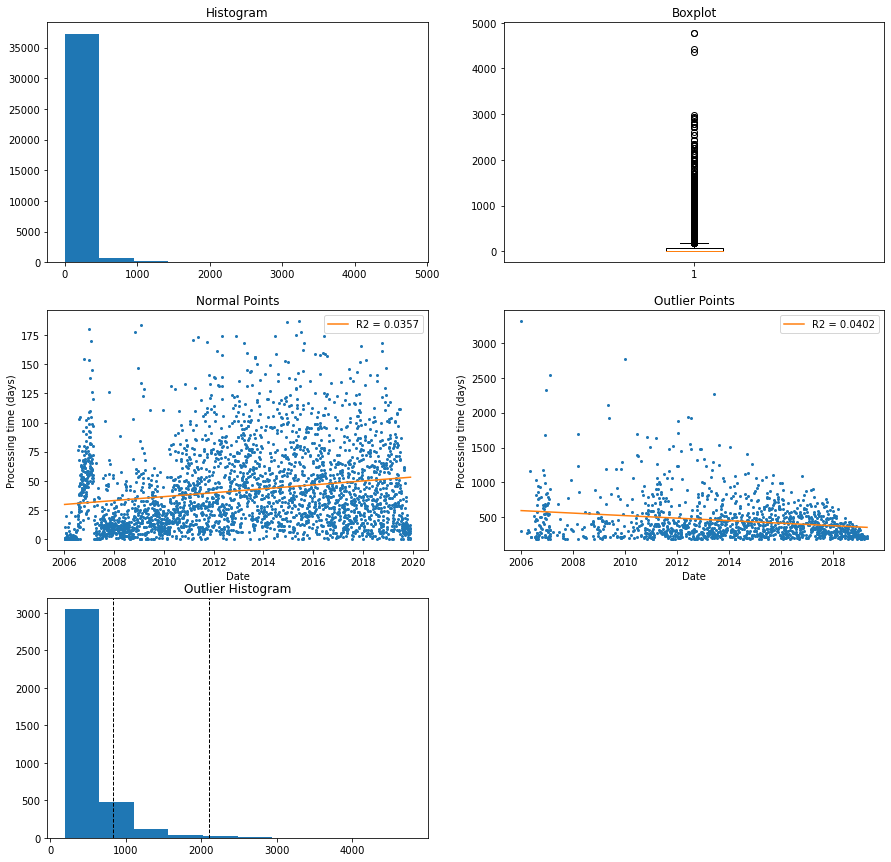

In [11]:
subframe(permit_list[0])

PERMIT - ELECTRIC WIRING
Our outliers are below -4.5, and above 7.5
Percentage of outliers in data: 17%
The number of outliers is: 36938
q99 = 571.0


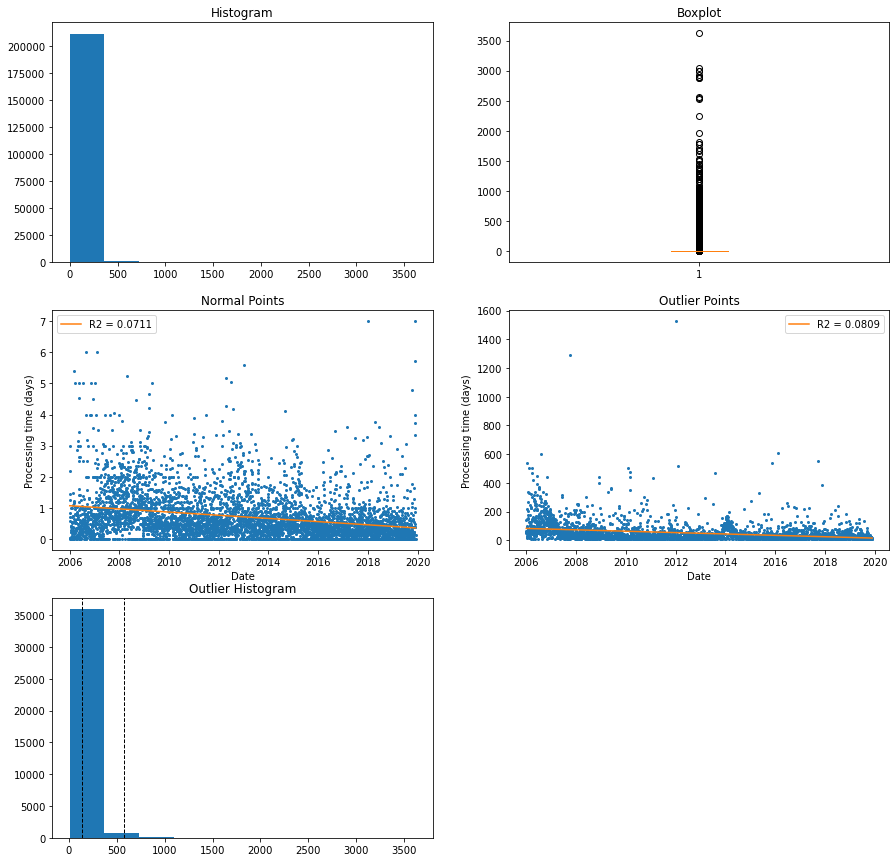

In [12]:
subframe(permit_list[1])

PERMIT - RENOVATION/ALTERATION
Our outliers are below -58.5, and above 97.5
Percentage of outliers in data: 09%
The number of outliers is: 10569
q99 = 675.5


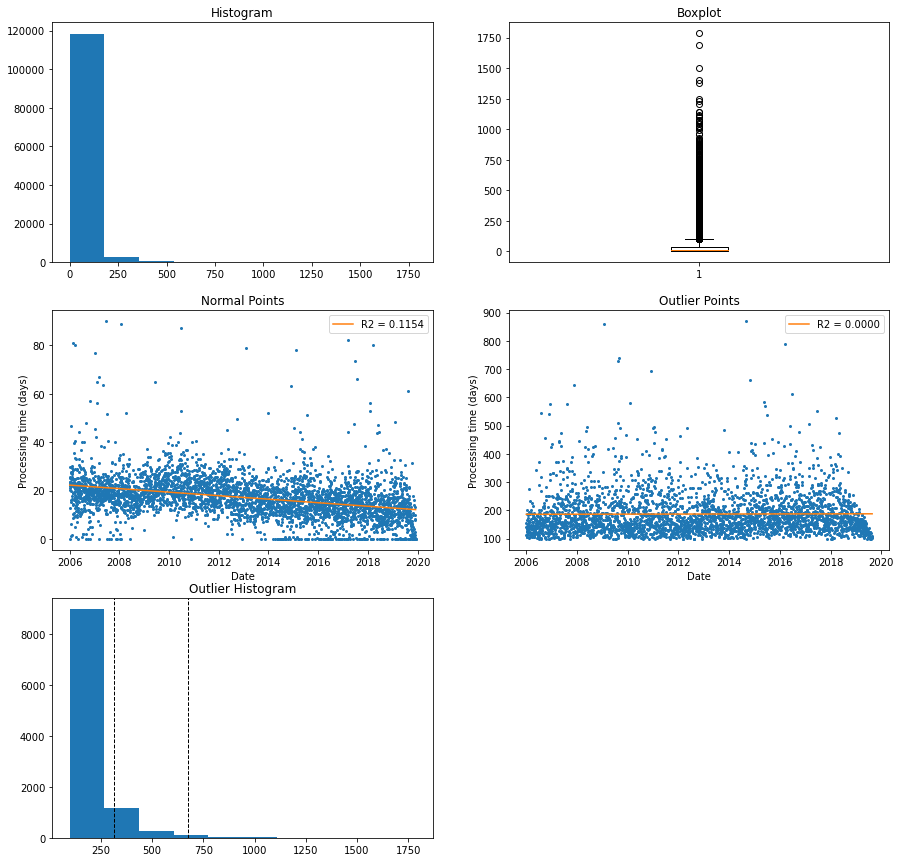

In [13]:
subframe(permit_list[2])

PERMIT - EASY PERMIT PROCESS
Our outliers are below 0.0, and above 0.0
Percentage of outliers in data: 09%
The number of outliers is: 14993


C:\Users\Michael\anaconda3\envs\build\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


q99 = 147.5


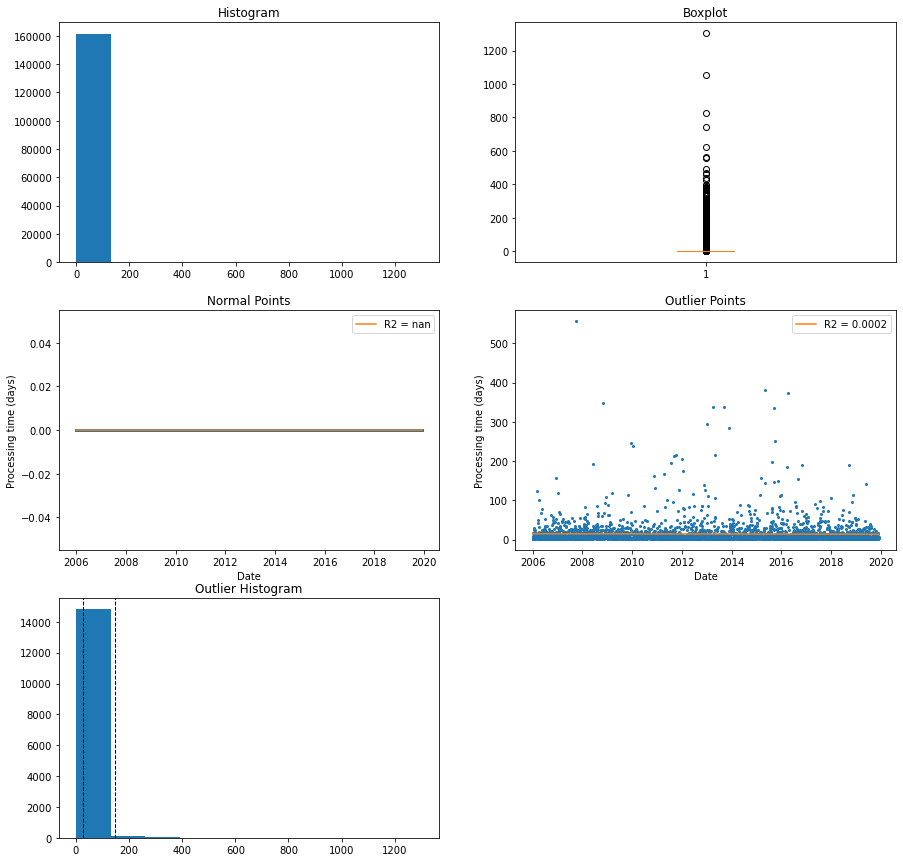

In [14]:
subframe(permit_list[3])

PERMIT - ELEVATOR EQUIPMENT
Our outliers are below 0.0, and above 0.0
Percentage of outliers in data: 18%
The number of outliers is: 2600


C:\Users\Michael\anaconda3\envs\build\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


q99 = 70.0


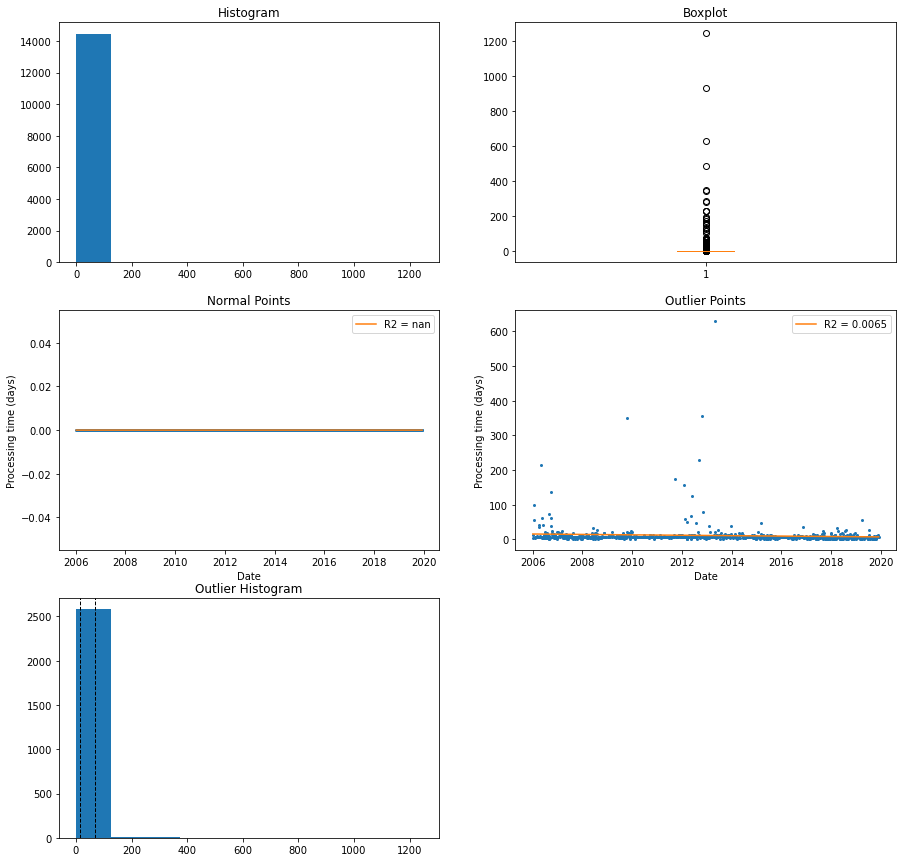

In [15]:
subframe(permit_list[4])

PERMIT - NEW CONSTRUCTION
Our outliers are below -64.5, and above 107.5
Percentage of outliers in data: 10%
The number of outliers is: 2152
q99 = 761.0


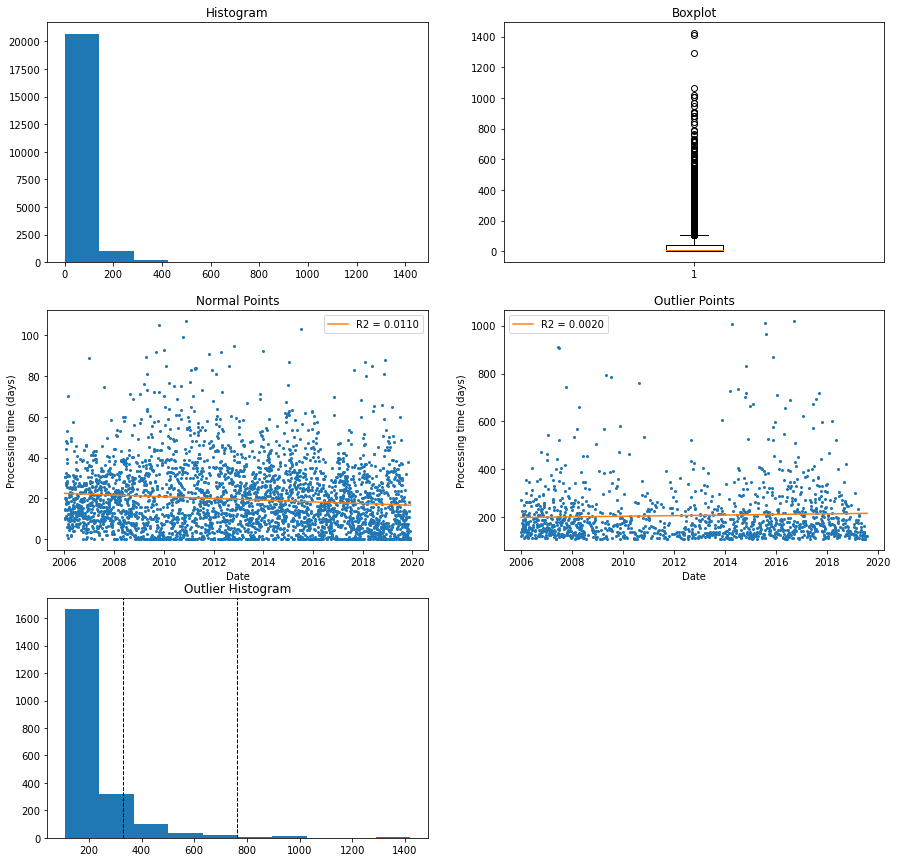

In [16]:
subframe(permit_list[5])

PERMIT - WRECKING/DEMOLITION
Our outliers are below -63.0, and above 105.0
Percentage of outliers in data: 06%
The number of outliers is: 1017
q99 = 559.5


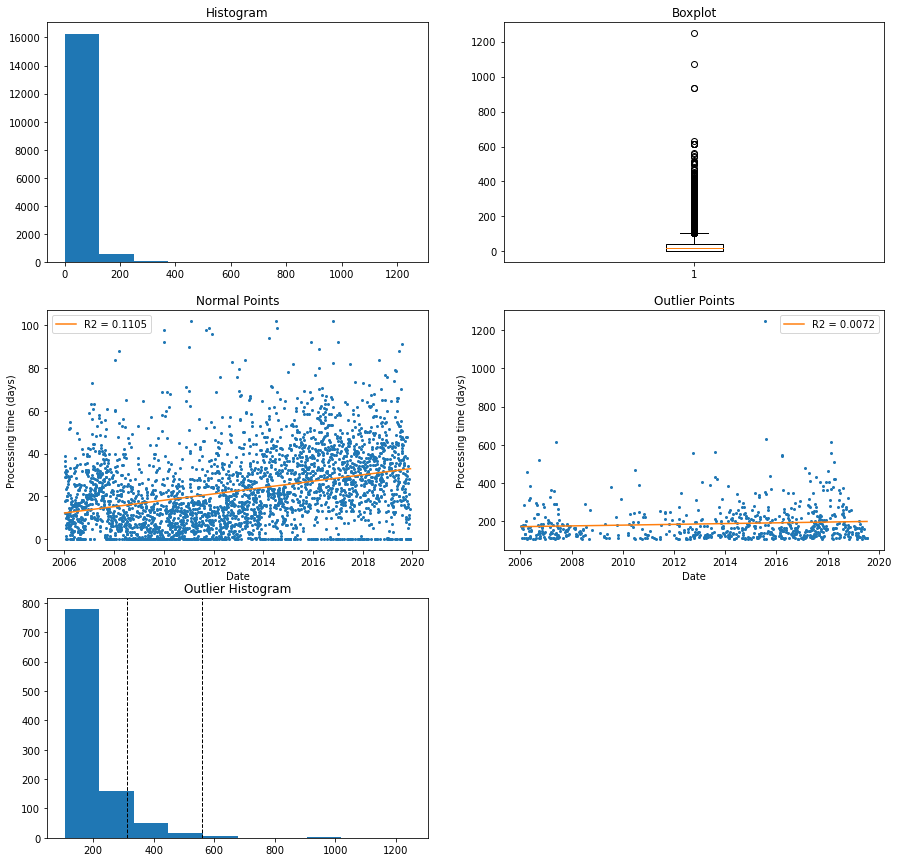

In [17]:
subframe(permit_list[6])

PERMIT - REINSTATE REVOKED PMT
Our outliers are below 0.0, and above 0.0
Percentage of outliers in data: 23%
The number of outliers is: 701


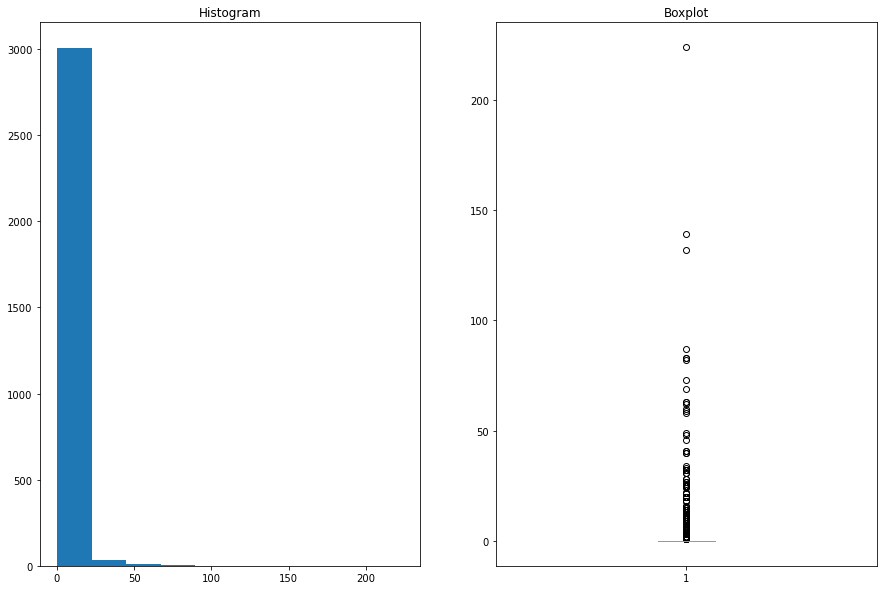

In [18]:
subframe(permit_list[7])

PERMIT - SCAFFOLDING
Our outliers are below 0.0, and above 0.0
Percentage of outliers in data: 04%
The number of outliers is: 329


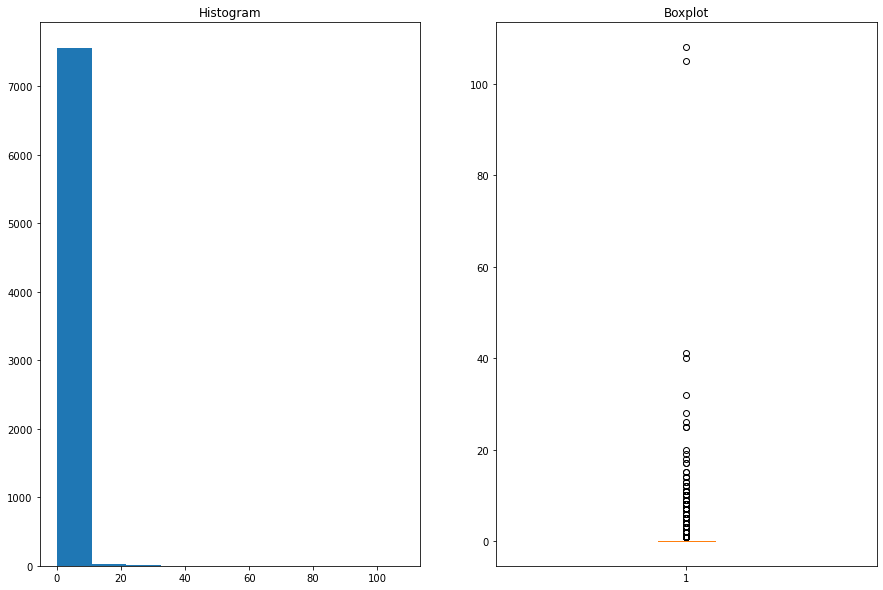

In [19]:
subframe(permit_list[8])

PERMIT - PORCH CONSTRUCTION
Our outliers are below -21.0, and above 35.0
Percentage of outliers in data: 12%
The number of outliers is: 342


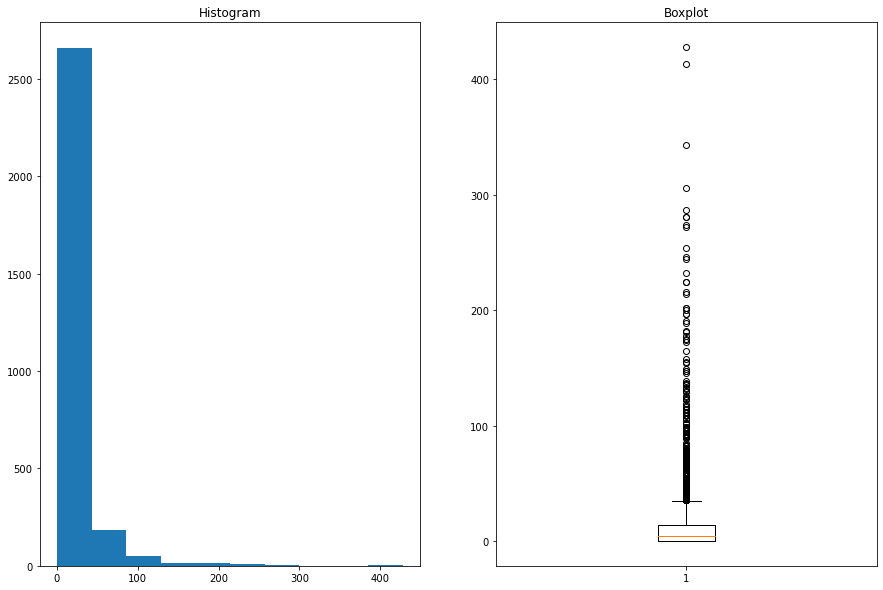

In [20]:
subframe(permit_list[9])

PERMIT - FOR EXTENSION OF PMT
Our outliers are below 0.0, and above 0.0
Percentage of outliers in data: 07%
The number of outliers is: 4


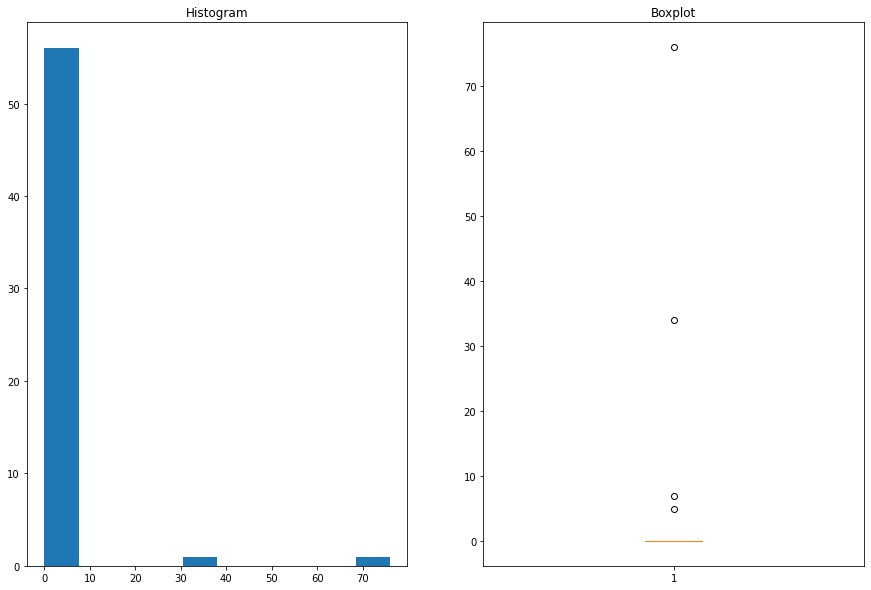

In [21]:
subframe(permit_list[10])

What did we learn from all these graphs.  Many of the permits are approved same day, some outliers do exist.  I think for further analysis we have to investigate each, learn what they mean to come up with any conclusion.  I could not find a relationship between this and the other data table downloaded.

In [22]:
data = pd.DataFrame({'date':['6/2/2017','5/23/2017','5/20/2017','6/22/2017','6/21/2017'],'Revenue':[100,200,300,400,500]})
data.date = pd.to_datetime(data.date)
data.date.dtype

dtype('<M8[ns]')

I have to investigate this other dataset, call it dff

In [23]:
dff = pd.read_csv('building-and-safety-permit-information.csv')

C:\Users\Michael\anaconda3\envs\build\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
col = dff.columns.to_list()

In [25]:
# cols 0-5 are surveying map numbers
# cols 8 Status -- Interesting
# cols 9 Status Date -- Interesting
# cols 10 Permit Type -- Interesting
# cols 11 Permit Sub-Type -- Interesting
# cols 13 Project Number -- Interesting
# cols 16 Issue Date -- Interesting
# cols 17-27 Address
# cols 28 Work Description -- Interesting
# cols 29 Valuation of work -- Interesting
# cols 34 Contractor Business Name -- Interesting
dff = dff.drop(columns=['Assessor Book','Assessor Page','Assessor Parcel','Tract','Block',
 'Lot','Event Code','Initiating Office','Address Start','Address Fraction Start','Address End',
 'Address Fraction End','Street Direction','Street Name','Street Suffix','Suffix Direction',
 'Unit Range Start','Unit Range End','Zip Code',"Contractor's Business Name",'Contractor Address',
 'Contractor City','Contractor State','License Type','License #','Principal First Name',
 'Principal Middle Name','Principal Last Name','License Expiration Date','Applicant First Name',
 'Applicant Last Name','Applicant Business Name','Applicant Address 1','Applicant Address 2',
 'Applicant Address 3','Zone','Census Tract','Council District','Latitude/Longitude',
 'Applicant Relationship','Existing Code','Proposed Code','Zip Codes','Census Tracts',
 'Precinct Boundaries','LA Specific Plans','Council Districts','Neighborhood Councils (Certified)'])

In [26]:
print(dff.shape)
dff.head()

(1082006, 17)


,Reference # (Old Permit #),PCIS Permit #,Status,Status Date,Permit Type,Permit Sub-Type,Permit Category,Project Number,Issue Date,Work Description,Valuation,Floor Area-L.A. Zoning Code Definition,# of Residential Dwelling Units,# of Accessory Dwelling Units,# of Stories,Occupancy,Floor Area-L.A. Building Code Definition
0,NaN,15044-90000-08405,Permit Finaled,2015-09-10T00:00:00.000,HVAC,1 or 2 Family Dwelling,No Plan Check,NaN,2015-08-18T00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,16SL57806,16016-70000-02464,Permit Finaled,2017-08-01T00:00:00.000,Bldg-Alter/Repair,1 or 2 Family Dwelling,No Plan Check,NaN,2016-02-04T00:00:00.000,General rehabilitation for single family dwell...,40000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,14VN81535,14016-20000-13092,Issued,2014-08-13T00:00:00.000,Bldg-Alter/Repair,Apartment,Plan Check,NaN,2014-08-13T00:00:00.000,PHOTOVOLTAIC SOLAR PANELS ON ROOF OF (E) APT BLDG,37000.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,16044-30000-09658,Permit Finaled,2016-08-29T00:00:00.000,HVAC,1 or 2 Family Dwelling,No Plan Check,NaN,2016-08-22T00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,NaN,17042-90000-31792,Permit Finaled,2017-12-28T00:00:00.000,Plumbing,1 or 2 Family Dwelling,No Plan Check,NaN,2017-12-26T00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [27]:
permit_list_2 = dff['Permit Type'].unique()
print(permit_list_2)

['HVAC' 'Bldg-Alter/Repair' 'Plumbing' 'Bldg-New' 'Electrical'
 'Nonbldg-New' 'Bldg-Addition' 'Elevator' 'Bldg-Demolition'
 'Fire Sprinkler' 'Pressure Vessel' 'Nonbldg-Alter/Repair' 'Grading'
 'Swimming-Pool/Spa' 'Sign' 'Nonbldg-Addition' 'Nonbldg-Demolition'
 'Bldg-Relocation']


In [28]:
dg = dff[['Status Date','Issue Date']].copy()
dg.shape
dg.head()

,Status Date,Issue Date
0,2015-09-10T00:00:00.000,2015-08-18T00:00:00.000
1,2017-08-01T00:00:00.000,2016-02-04T00:00:00.000
2,2014-08-13T00:00:00.000,2014-08-13T00:00:00.000
3,2016-08-29T00:00:00.000,2016-08-22T00:00:00.000
4,2017-12-28T00:00:00.000,2017-12-26T00:00:00.000


In [29]:
print(type(dg.iloc[3,1]))
# pd.to_datetime(dff['Status Date'])
# pd.to_datetime(dff.iloc[1,1])
# dff['Status Date'].dtype

<class 'str'>


In [33]:
dg['diff'] = dg['Status Date'] - dg['Issue Date']
dg.head()

TypeError: unsupported operand type(s) for -: 'str' and 'str'